## Number of possible chords 

Let's see the number of possible chords

In [1]:
from jl_dictionaries import Dictionaries

In [2]:
Dictionaries.get_all_possible_chords()

['C3',
 'C5',
 'C',
 'Cm',
 'Cdim',
 'Caug',
 'Csus2',
 'Csus4',
 'C6',
 'C7',
 'C7-5',
 'Cmaj7b5',
 'C7+5',
 'C6sus2',
 'C7sus2',
 'C7sus4',
 'Cm6',
 'Cm7',
 'CAmMaj7',
 'Cm7b5',
 'Cdim6',
 'CM7',
 'CM7+5',
 'Cadd9',
 'Cmadd9',
 'Cadd2',
 'Cadd4',
 'Cadd11',
 'Csus4(add13)',
 'C6/9',
 'C6add11',
 'Cm6add11',
 'Cadd4add9',
 'C9',
 'Cm9',
 'CM9',
 'C9sus4',
 'C7_6',
 'C7-9',
 'C7+9',
 'C9-5',
 'C9+5',
 'C7#9b5',
 'C7#9#5',
 'C7b9b5',
 'C7b9#5',
 'C11',
 'C7+11',
 'Cm7add11',
 'Cmaj11',
 'Cm11',
 'C7b9#9',
 'C7b9#11',
 'C7#9#11',
 'C7-13',
 'Cm7add4',
 'C9+11',
 'Cm9+11',
 'C13',
 'Cmaj13',
 'Cmadd13',
 'C13sus4',
 'C13-9',
 'C13+9',
 'C13+11',
 'Cm13+11',
 'Cmadd11',
 'Db3',
 'Db5',
 'Db',
 'Dbm',
 'Dbdim',
 'Dbaug',
 'Dbsus2',
 'Dbsus4',
 'Db6',
 'Db7',
 'Db7-5',
 'Dbmaj7b5',
 'Db7+5',
 'Db6sus2',
 'Db7sus2',
 'Db7sus4',
 'Dbm6',
 'Dbm7',
 'DbAmMaj7',
 'Dbm7b5',
 'Dbdim6',
 'DbM7',
 'DbM7+5',
 'Dbadd9',
 'Dbmadd9',
 'Dbadd2',
 'Dbadd4',
 'Dbadd11',
 'Dbsus4(add13)',
 'Db6/9',
 'Db6add1

In [32]:
vocab_size = len(Dictionaries.get_all_possible_chords())
vocab_size

804

Keras provides the one_hot() function that creates a hash of each word as an efficient integer encoding. We will estimate the vocabulary size of 100, which is larger than needed to reduce the probability of collisions from the hash function.

In [68]:
class Encoder:
    def __init__(self,all_chords):
        self.chord_to_number_dict = {}
        self.number_to_chord_dict = {}
        
        for number,chord in enumerate(all_chords):
            
            self.chord_to_number_dict[chord] = number
            self.number_to_chord_dict[number] = chord
            
        print(len(self.chord_to_number_dict))
        print(len(self.number_to_chord_dict))

    def get_chord_from_number(self, number):
        return self.number_to_chord_dict[number]
    
    def get_number_from_chord(self, chord):
        return self.chord_to_number_dict[chord]

In [69]:
encoder = Encoder(Dictionaries.get_all_possible_chords())

804
804


In [70]:
encoder.number_to_chord_dict

{0: 'C3',
 1: 'C5',
 2: 'C',
 3: 'Cm',
 4: 'Cdim',
 5: 'Caug',
 6: 'Csus2',
 7: 'Csus4',
 8: 'C6',
 9: 'C7',
 10: 'C7-5',
 11: 'Cmaj7b5',
 12: 'C7+5',
 13: 'C6sus2',
 14: 'C7sus2',
 15: 'C7sus4',
 16: 'Cm6',
 17: 'Cm7',
 18: 'CAmMaj7',
 19: 'Cm7b5',
 20: 'Cdim6',
 21: 'CM7',
 22: 'CM7+5',
 23: 'Cadd9',
 24: 'Cmadd9',
 25: 'Cadd2',
 26: 'Cadd4',
 27: 'Cadd11',
 28: 'Csus4(add13)',
 29: 'C6/9',
 30: 'C6add11',
 31: 'Cm6add11',
 32: 'Cadd4add9',
 33: 'C9',
 34: 'Cm9',
 35: 'CM9',
 36: 'C9sus4',
 37: 'C7_6',
 38: 'C7-9',
 39: 'C7+9',
 40: 'C9-5',
 41: 'C9+5',
 42: 'C7#9b5',
 43: 'C7#9#5',
 44: 'C7b9b5',
 45: 'C7b9#5',
 46: 'C11',
 47: 'C7+11',
 48: 'Cm7add11',
 49: 'Cmaj11',
 50: 'Cm11',
 51: 'C7b9#9',
 52: 'C7b9#11',
 53: 'C7#9#11',
 54: 'C7-13',
 55: 'Cm7add4',
 56: 'C9+11',
 57: 'Cm9+11',
 58: 'C13',
 59: 'Cmaj13',
 60: 'Cmadd13',
 61: 'C13sus4',
 62: 'C13-9',
 63: 'C13+9',
 64: 'C13+11',
 65: 'Cm13+11',
 66: 'Cmadd11',
 67: 'Db3',
 68: 'Db5',
 69: 'Db',
 70: 'Dbm',
 71: 'Dbdim',
 72: '

## Prepare data 

In [89]:
from jl_song_data import SongData
from jl_constants import NUMBER_OF_NOTES

In [90]:
data = SongData('../data/chords_clean_1_2_3_4_5_6.csv')
df = data.df

In [91]:
df['chords'] = df['chords'].apply(eval)

In [92]:
from jl_chord_parser import ChordParser
parse = ChordParser().parse

In [93]:
df['chord_numbers'] = df['chords']\
        .apply(lambda chords: [parse(chord) for chord in chords])\
        .apply(lambda chords: [encoder.get_number_from_chord(chord.standard_name) for chord in chords if chord is not None ] )

In [94]:
df.sample(10)

,url,name,decade,genre,chords,uuid,chord_numbers
11754,https://tabs.ultimate-guitar.com/tab/tame_impa...,The Less I Know The Better (ver 2),2010s,Rock%%Electronic,"[Dbm, B, E, Abm, B, Dbm, B, E, Abm, Dbm, B, E,...",22339020-017e-4b6b-ab69-688d9450bb2a,"[70, 739, 270, 539, 739, 70, 739, 270, 539, 70..."
8406,https://tabs.ultimate-guitar.com/tab/melanie-c...,I Want Candy,2000s,Pop,"[C, C, C, F, C, C, C, F, C, C, C, F, C, C, C, ...",8222fda1-c030-49a6-b916-490afc0284ae,"[2, 2, 2, 337, 2, 2, 2, 337, 2, 2, 2, 337, 2, ..."
9940,https://tabs.ultimate-guitar.com/tab/pointer-s...,Im So Excited (ver 3),1980s,Disco%%Disco%%Rhythm And Blues,"[Gm7, Bb/C, Cm7, Bb/C, Cm7, Bb/C, Cm7, Bb/Eb, ...",9bf7b788-df6c-46f8-90a0-5d6c7139796a,"[486, 672, 17, 672, 17, 672, 17, 672, 203, 672..."
4595,https://tabs.ultimate-guitar.com/tab/frank-sin...,Be Careful Its My Heart (ver 2),1960s,Jazz,"[F6, A7, Bb, F, Am7, D7, G, C7+, C7, Gm7, C7, ...",8cf41429-5214-434f-9dd9-623bacafa43e,"[343, 612, 672, 337, 620, 143, 471, 12, 9, 486..."
13,https://tabs.ultimate-guitar.com/tab/1136507,Clown,2010s,Rhythm And Blues%%Contemporary R&b,"[Am, D/F#, G, Am, D/F#, G, Am, D/F#, Em, C, Cm...",847a9a07-9773-4eab-a5c6-6e0cbe7f7357,"[606, 136, 471, 606, 136, 471, 606, 136, 271, ..."
5548,https://tabs.ultimate-guitar.com/tab/hillsong-...,Love Goes On (ver 4),2010s,Religious Music,"[A, C#m, E, A, C#m, E, B, A, C#m, E, B, A, C#m...",3a70c6ee-5e0c-4d0c-a5d2-ab2963c54974,"[605, 70, 270, 605, 70, 270, 739, 605, 70, 270..."
12798,https://tabs.ultimate-guitar.com/tab/the_verve...,Bitter Sweet Symphony (ver 2),1990s,Rock,"[E, Bm7, Asus4, A, E, E, Bm7, Asus4, A, E, Bm7...",db01536b-0ed1-4f45-8be9-d4127bba2b21,"[270, 754, 610, 605, 270, 270, 754, 610, 605, ..."
12331,https://tabs.ultimate-guitar.com/tab/the_everl...,Long Time Gone (ver 2),1950s,Folk,"[D, A7, G, D, A7, D, G, D, A7, D, D, A7, G, D,...",b59ac840-9cd2-472a-84cc-49b866ffdbd2,"[136, 612, 471, 136, 612, 136, 471, 136, 612, ..."
13816,https://tabs.ultimate-guitar.com/tab/whigfield...,Close To You (ver 2),1990s,Electronic,"[D, F#m, G, Bm, A, Gm, Em, D, G, A, D, G, A, D...",b6021f85-3235-4268-91a2-28c143f3a701,"[136, 405, 471, 740, 605, 472, 271, 136, 471, ..."
9893,https://tabs.ultimate-guitar.com/tab/pink-floy...,Hey You,1970s,Rock,"[Em, Dm, Em, Dm, Emadd9, Bm, Emadd9, Bm, D, D7...",68bfbf09-aa16-473f-b928-ff58c0ae0075,"[271, 137, 271, 137, 292, 740, 292, 740, 136, ..."


In [95]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.layers.recurrent import LSTM
from keras import optimizers
from keras.utils import to_categorical

In [96]:
df = df[df['chord_numbers'].apply(lambda chords: len(chords) > 5)]

In [97]:
df.iloc[0]

url              https://tabs.ultimate-guitar.com/tab/10000_man...
name                                                     Dont Talk
decade                                                       1980s
genre                                                         Folk
chords           [D, Dmaj7, D, Dmaj7, D, Dmaj7, D, Dmaj7, D, Dm...
uuid                          c639eb23-fefd-4263-af20-3f78f110edcd
chord_numbers    [136, 155, 136, 155, 136, 155, 136, 155, 136, ...
Name: 0, dtype: object

In [98]:
import numpy as np

In [99]:
maxlen = 5
step = 1
sentences = []
next_chords = []

for index, row in df.iterrows():
    sequence = row['chord_numbers']
    for i in range(0, len(sequence) - maxlen, step):
        sentences.append(sequence[i: i + maxlen])
        next_chords.append(sequence[i + maxlen])

In [100]:
len(sentences)

1136924

In [101]:
len(next_chords)

1136924

In [102]:
sentences[0]

[136, 155, 136, 155, 136]

In [103]:
next_chords[0]

155

In [104]:
next_chords = to_categorical(next_chords, num_classes=vocab_size)

In [105]:
len(next_chords[0])

804

In [106]:
X = np.array(sentences)

In [107]:
Y = np.array(next_chords)

In [158]:
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
# https://medium.com/towards-artificial-intelligence/sentence-prediction-using-word-level-lstm-text-generator-language-modeling-using-rnn-a80c4cda5b40
model = Sequential()
model.add(Embedding(vocab_size, maxlen,input_length=maxlen))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(50,activation='relu'))
model.add(Dense(vocab_size,activation='softmax'))
opt_adam = optimizers.adam(lr=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt_adam,metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 5, 5)              4020      
_________________________________________________________________
lstm_17 (LSTM)               (None, 5, 50)             11200     
_________________________________________________________________
lstm_18 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_16 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_17 (Dense)             (None, 804)               41004     
Total params: 78,974
Trainable params: 78,974
Non-trainable params: 0
_________________________________________________________________


In [161]:
from keras.callbacks.callbacks import ModelCheckpoint

In [162]:
path = 'word_pred_Model4.h5'
checkpoint = ModelCheckpoint(path, monitor='loss', verbose=1, save_best_only=True, mode='min')
model.fit(X,Y,epochs=500,batch_size=128,verbose=1,use_multiprocessing=True,callbacks=[checkpoint])


/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/500
1136924/1136924 [==============================] - 94s 83us/step - loss: 2.6008 - accuracy: 0.2543

Epoch 00001: loss improved from inf to 2.60075, saving model to word_pred_Model4.h5
Epoch 2/500
1136924/1136924 [==============================] - 92s 81us/step - loss: 2.2008 - accuracy: 0.3976

Epoch 00002: loss improved from 2.60075 to 2.20085, saving model to word_pred_Model4.h5
Epoch 3/500
1136924/1136924 [==============================] - 93s 82us/step - loss: 2.0702 - accuracy: 0.4405

Epoch 00003: loss improved from 2.20085 to 2.07017, saving model to word_pred_Model4.h5
Epoch 4/500
1136924/1136924 [==============================] - 96s 84us/step - loss: 2.0029 - accuracy: 0.4599

Epoch 00004: loss improved from 2.07017 to 2.00286, saving model to word_pred_Model4.h5
Epoch 5/500
1136924/1136924 [==============================] - 94s 83us/step - loss: 1.9609 - accuracy: 0.4715

Epoch 00005: loss improved from 2.00286 to 1.96089, saving model to word_pred_Model4.h5
Epoc

1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7748 - accuracy: 0.5223

Epoch 00042: loss improved from 1.77568 to 1.77482, saving model to word_pred_Model4.h5
Epoch 43/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7739 - accuracy: 0.5227

Epoch 00043: loss improved from 1.77482 to 1.77394, saving model to word_pred_Model4.h5
Epoch 44/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7730 - accuracy: 0.5231

Epoch 00044: loss improved from 1.77394 to 1.77302, saving model to word_pred_Model4.h5
Epoch 45/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7722 - accuracy: 0.5229

Epoch 00045: loss improved from 1.77302 to 1.77216, saving model to word_pred_Model4.h5
Epoch 46/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7717 - accuracy: 0.5234

Epoch 00046: loss improved from 1.77216 to 1.77169, saving model to word_pred_Model4.h5
Epoch 47

1136924/1136924 [==============================] - 81s 71us/step - loss: 1.7557 - accuracy: 0.5275

Epoch 00083: loss improved from 1.75618 to 1.75571, saving model to word_pred_Model4.h5
Epoch 84/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7561 - accuracy: 0.5275

Epoch 00084: loss did not improve from 1.75571
Epoch 85/500
1136924/1136924 [==============================] - 81s 71us/step - loss: 1.7554 - accuracy: 0.5276

Epoch 00085: loss improved from 1.75571 to 1.75536, saving model to word_pred_Model4.h5
Epoch 86/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7550 - accuracy: 0.5276

Epoch 00086: loss improved from 1.75536 to 1.75503, saving model to word_pred_Model4.h5
Epoch 87/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7550 - accuracy: 0.5278

Epoch 00087: loss improved from 1.75503 to 1.75497, saving model to word_pred_Model4.h5
Epoch 88/500
1136924/1136924 [===================


Epoch 00126: loss improved from 1.74993 to 1.74951, saving model to word_pred_Model4.h5
Epoch 127/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7496 - accuracy: 0.5292

Epoch 00127: loss did not improve from 1.74951
Epoch 128/500
1136924/1136924 [==============================] - 80s 71us/step - loss: 1.7494 - accuracy: 0.5291

Epoch 00128: loss improved from 1.74951 to 1.74941, saving model to word_pred_Model4.h5
Epoch 129/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7495 - accuracy: 0.5295

Epoch 00129: loss did not improve from 1.74941
Epoch 130/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7493 - accuracy: 0.5295

Epoch 00130: loss improved from 1.74941 to 1.74930, saving model to word_pred_Model4.h5
Epoch 131/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7496 - accuracy: 0.5294

Epoch 00131: loss did not improve from 1.74930
Epoch 132/500
1136924/11

1136924/1136924 [==============================] - 81s 71us/step - loss: 1.7475 - accuracy: 0.5297

Epoch 00173: loss did not improve from 1.74701
Epoch 174/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7473 - accuracy: 0.5303

Epoch 00174: loss did not improve from 1.74701
Epoch 175/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7471 - accuracy: 0.5301

Epoch 00175: loss did not improve from 1.74701
Epoch 176/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7467 - accuracy: 0.5301

Epoch 00176: loss improved from 1.74701 to 1.74667, saving model to word_pred_Model4.h5
Epoch 177/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7474 - accuracy: 0.5301

Epoch 00177: loss did not improve from 1.74667
Epoch 178/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7468 - accuracy: 0.5302

Epoch 00178: loss did not improve from 1.74667
Epoch 1


Epoch 00222: loss did not improve from 1.74572
Epoch 223/500
1136924/1136924 [==============================] - 80s 71us/step - loss: 1.7462 - accuracy: 0.5308

Epoch 00223: loss did not improve from 1.74572
Epoch 224/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7458 - accuracy: 0.5305

Epoch 00224: loss did not improve from 1.74572
Epoch 225/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7464 - accuracy: 0.5303

Epoch 00225: loss did not improve from 1.74572
Epoch 226/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7461 - accuracy: 0.5305

Epoch 00226: loss did not improve from 1.74572
Epoch 227/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7461 - accuracy: 0.5307

Epoch 00227: loss did not improve from 1.74572
Epoch 228/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7463 - accuracy: 0.5305

Epoch 00228: loss did not improve

1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7456 - accuracy: 0.5312

Epoch 00272: loss did not improve from 1.74533
Epoch 273/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7463 - accuracy: 0.5308

Epoch 00273: loss did not improve from 1.74533
Epoch 274/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7457 - accuracy: 0.5309

Epoch 00274: loss did not improve from 1.74533
Epoch 275/500
1136924/1136924 [==============================] - 81s 71us/step - loss: 1.7459 - accuracy: 0.5308

Epoch 00275: loss did not improve from 1.74533
Epoch 276/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7461 - accuracy: 0.5305

Epoch 00276: loss did not improve from 1.74533
Epoch 277/500
1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7460 - accuracy: 0.5309

Epoch 00277: loss did not improve from 1.74533
Epoch 278/500
1136924/1136924 [=================

1136924/1136924 [==============================] - 80s 70us/step - loss: 1.7462 - accuracy: 0.5308

Epoch 00323: loss did not improve from 1.74533
Epoch 324/500
1136924/1136924 [==============================] - 86s 76us/step - loss: 1.7466 - accuracy: 0.5308

Epoch 00324: loss did not improve from 1.74533
Epoch 325/500
1136924/1136924 [==============================] - 92s 81us/step - loss: 1.7463 - accuracy: 0.5309

Epoch 00325: loss did not improve from 1.74533
Epoch 326/500
1136924/1136924 [==============================] - 90s 79us/step - loss: 1.7459 - accuracy: 0.5308

Epoch 00326: loss did not improve from 1.74533
Epoch 327/500
1136924/1136924 [==============================] - 89s 78us/step - loss: 1.7463 - accuracy: 0.5307

Epoch 00327: loss did not improve from 1.74533
Epoch 328/500
1136924/1136924 [==============================] - 89s 78us/step - loss: 1.7464 - accuracy: 0.5307

Epoch 00328: loss did not improve from 1.74533
Epoch 329/500
1136924/1136924 [=================

KeyboardInterrupt: 

In [312]:
def cos_similarity(a,b):
    dot = np.dot(a, b)
    norma = np.linalg.norm(a)
    normb = np.linalg.norm(b)
    cos = dot / (norma * normb)
    
    return cos

In [317]:
from random import randint

def get_most_similar_chord(predicted):
    greatest_similarity = 0
    most_similar = None
    
    for chord in possible_chord_vectors.keys():
        similarity = cos_similarity(predicted, possible_chord_vectors[chord])
        
        if similarity > greatest_similarity:
            greatest_similarity = similarity
            most_similar = chord
    
    print(f'Most similar: {chord}. Similarity: {greatest_similarity}')
    
    return most_similar

def get_most_similar_chord_2(predicted):
    distance_function = lambda a,b: np.linalg.norm(a-b)
    lowest_distance = 10000000000
    most_similar = None
    
    for chord in possible_chord_vectors.keys():
        distance = distance_function(predicted, possible_chord_vectors[chord])
        
        if distance < lowest_distance:
            lowest_distance = distance
            most_similar = chord
    
    print(f'Most similar: {chord}. Distance: {lowest_distance}')
    
    return most_similar

def get_most_similar_ranking(prediction_chord, distance_function):
    df = pd.DataFrame()
    
    similar_chords = pd.DataFrame(possible_chord_vectors.keys(), columns=['chord'])
    similar_chords['similarity'] = similar_chords['chord'].apply(\
        lambda chord: distance_function(possible_chord_vectors[chord],prediction_chord[0]))
    
    return similar_chords.sort_values(by='similarity')

def get_most_similar_chord(prediction_chord):
    value = randint(0, 10)
    chord = get_most_similar_ranking(prediction_chord,lambda a,b: np.linalg.norm(a-b) ).iloc[0]['chord']
    print(chord)
    return chord
    



In [131]:
from music21.chord import Chord
from music21.stream import Stream

def show_sequence(chord_sequence):
    parser = ChordParser()
    stream = Stream()
    
    chord_sequence = [chord_sequence[0], *chord_sequence] # to solve a music21 problem

    for chord_str in chord_sequence:
        extended_chord = parser.parse(chord_str)
        chord = Chord(notes=extended_chord.components, type='whole')
        stream.append(chord)

    stream.show()
    stream.show('midi')

In [140]:
chord_str = ['C', 'G', 'C', 'D', 'G']

In [141]:
ch = [encoder.get_number_from_chord(chord) for chord in chord_str]
ch

[2, 471, 2, 136, 471]

In [145]:
def sample(a, temperature=1.0):
    # helper function to sample an index from a probability array
    a = np.log(a) / temperature
    a = np.exp(a) / np.sum(np.exp(a))
    return np.argmax(np.random.multinomial(1, a, 1))

In [153]:
prediction = model.predict(np.array(np.array([ch])))[0]
prediction

array([1.49345798e-08, 1.11169349e-04, 4.44702238e-01, 3.97179450e-04,
       1.06328243e-05, 1.49802781e-05, 3.17733269e-04, 5.79644329e-05,
       1.11192458e-04, 6.40410814e-04, 2.96807690e-10, 3.72812821e-08,
       1.42549447e-06, 1.68834324e-09, 5.73312313e-08, 2.84445355e-06,
       3.19488136e-05, 4.75193156e-05, 1.50218148e-06, 7.27504557e-10,
       3.28399244e-12, 6.20864099e-04, 6.02492925e-12, 5.52952848e-03,
       4.38876539e-11, 1.18524375e-04, 1.00109719e-06, 2.59786589e-07,
       6.34094860e-12, 6.26559995e-06, 6.84690889e-12, 4.89855032e-12,
       5.89729567e-12, 1.54068999e-04, 4.61916327e-09, 1.60827083e-04,
       9.56226600e-08, 3.92351082e-12, 4.99628108e-08, 9.10250662e-07,
       2.04261212e-08, 1.14961096e-11, 4.28413858e-12, 5.85180428e-12,
       2.80488935e-12, 1.88587405e-12, 9.75922376e-07, 2.31272237e-10,
       1.83641709e-12, 3.99403297e-12, 3.32128561e-11, 8.46166019e-12,
       2.31205398e-12, 2.44524583e-12, 5.34839617e-10, 6.01977149e-12,
      

In [156]:
sample(prediction, 0.8)

471

['Am', 'E', 'A', 'Dm', 'E']
['E', 'A', 'Dm', 'E', 'D']
['A', 'Dm', 'E', 'D', 'G']
['Dm', 'E', 'D', 'G', 'G']
['E', 'D', 'G', 'G', 'Am']
['D', 'G', 'G', 'Am', 'C']
['G', 'G', 'Am', 'C', 'C']
['G', 'Am', 'C', 'C', 'G']
['Am', 'C', 'C', 'G', 'C']
['C', 'C', 'G', 'C', 'G']
['C', 'G', 'C', 'G', 'G']
['G', 'C', 'G', 'G', 'C']
['C', 'G', 'G', 'C', 'C']
['G', 'G', 'C', 'C', 'D']
['G', 'C', 'C', 'D', 'C']
['C', 'C', 'D', 'C', 'D']
['C', 'D', 'C', 'D', 'G']
['D', 'C', 'D', 'G', 'C']
['C', 'D', 'G', 'C', 'C']
['D', 'G', 'C', 'C', 'Em']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


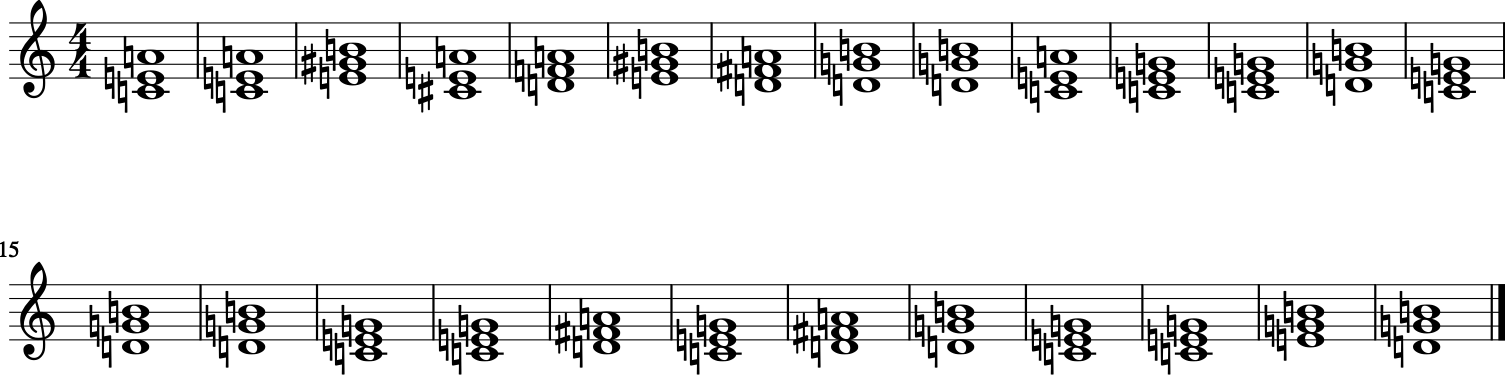

In [167]:
ch_str = ['Am', 'E', 'A', 'Dm', 'E']

for i in range(0,20):
    last_five = ch_str[-5:]
    print(last_five)
    ch = [encoder.get_number_from_chord(chord) for chord in chord_str]
    pre = model.predict(np.array(np.array([ch])))[0]
    chord_index = sample(pre)
    ch_str.append(encoder.get_chord_from_number(chord_index))

show_sequence(ch_str)